In [53]:
import pandas as pd
data=pd.read_csv("HousingData.csv")

In [54]:
data.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [55]:
data.isnull().sum()
data.fillna(99,inplace=True)
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

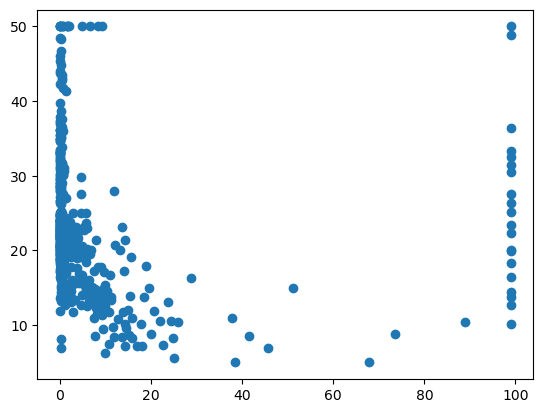

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(data['CRIM'],data['MEDV'])

In [57]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.050229,0.005934,0.021945,0.149969,-0.027601,0.100234,-0.146163,0.324107,0.288828,0.050145,-0.199047,0.012503,-0.095349
ZN,-0.050229,1.000000,-0.118904,-0.048986,-0.411220,0.271397,-0.451034,0.530824,-0.276104,-0.263130,-0.364783,0.112395,-0.168217,0.305759
INDUS,0.005934,-0.118904,1.000000,0.035507,0.314864,-0.211520,0.273190,-0.264780,0.214789,0.242360,0.119894,-0.116751,0.060848,-0.217123
CHAS,0.021945,-0.048986,0.035507,1.000000,0.043363,-0.084352,0.020052,0.013027,0.087478,0.080144,0.004160,-0.010872,0.021757,-0.075330
NOX,0.149969,-0.411220,0.314864,0.043363,1.000000,-0.302188,0.701210,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.193649,-0.427321
RM,-0.027601,0.271397,-0.211520,-0.084352,-0.302188,1.000000,-0.230777,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.186831,0.695360
AGE,0.100234,-0.451034,0.273190,0.020052,0.701210,-0.230777,1.000000,-0.712440,0.432134,0.484497,0.255167,-0.270818,0.154647,-0.364415
DIS,-0.146163,0.530824,-0.264780,0.013027,-0.769230,0.205246,-0.712440,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.182763,0.249929
RAD,0.324107,-0.276104,0.214789,0.087478,0.611441,-0.209847,0.432134,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.189888,-0.381626
TAX,0.288828,-0.263130,0.242360,0.080144,0.668023,-0.292048,0.484497,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.203174,-0.468536


In [58]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)


In [60]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(xtrain,ytrain)

LinearRegression()

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_score(linear,xtrain,ytrain,scoring="neg_mean_squared_error",cv=5)

array([-45.9828575 , -23.69771623, -35.44544984, -43.28201802,
       -28.2325347 ])

In [63]:
ypred=linear.predict(xtest)
residuals=ytest-ypred

In [64]:
residuals

307   -3.027743
343   -2.785158
47    -3.757895
67    -0.293252
362    8.442363
         ...   
467    0.716422
95    -0.161145
122   -0.594418
260   -1.474336
23    -0.785210
Name: MEDV, Length: 152, dtype: float64